In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

# pandas settings
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

---

# Part 3 - Model Building

---

### Contents

<a href = "part-1_reddit_scraper.ipynb">Part 1 - Reddit Scraper</a>


<a href = "part-2_eda_and_data_cleaning.ipynb">Part 2 - EDA and Data Cleaning</a><br>


Part 3 - Model Building


- [Preprocessing Data for Modeling](#Preprocessing-Data-for-Modeling)


- [Model Selection](#Model-Selection)
    - [Dictionary and Confusion Matrix Creation](#Dictionary-and-Confusion-Matrix-Creation)
    - [Testing Different Models](#Testing-Different-Models)
    

- [Model Optimisation](#Model-Optimisation)


- [Discussion](#Discussion)
    - [Extracing Feature Importance](#Extracing-Feature-Importance)

---

## Preprocessing Data for Modeling
[top](#Contents)

As is the case for all modeling, the data was first imported and the target and features seperated. A train-test-split was then performed on the data.

In [2]:
# importing data

data = pd.read_csv("data/final_cleaned.csv")

In [3]:
# defining the features and target

features = list(data.columns)
features.remove('subreddit')

X = data[features]
y = data['subreddit']

In [4]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=25,
                                                    stratify=y)

---

## Model Selection
[top](#Contents)

Three different models were examined as classifiers: Multinomial Naive Bayes, K-nearest-neighbords and Random Forests. To give a better gauge of accuracy, a GridSearchCV was ran with basic parameters to provide some minor optimization for all three models. 

The results show that the the RandomForest Classifier (train score = 0.76, test score = 0.71) outperformed the K-Nearest-Neighbors classifier (train score = 0.70, test score = 0.52) by a wide margin. The RandomForest Classifier equalled the Multinomal Naive Bayes Classifier (train score = 0.77, test score = 0.66) in the training data, but was superior in generalizing for the test data. 

This can also be observed in the confusion matrices for the classifiers, where the RandomForest confusion matrix showed less false positives and false negatives as compared to the other two classifiers.

Consequently, the RandomForest Classifier was chosen for further optimization.

### Dictionary and Confusion Matrix Creation
[top](#Contents)

In [5]:
# creating a dictionary of models to test

clas_dict = {"nb": MultinomialNB(),
             "knc": KNeighborsClassifier(),
             "rf": RandomForestClassifier()}

In [6]:
# random state set to provide similar results

random_state = 42

# creating basic parameters for a GridSearch to search through

clas_param = {    
            "nb" :{
                'alpha': np.linspace(0.01,0.1,10),
                  },
    
            "knc": {
                'leaf_size': list(range(1,5)),
                'n_neighbors': list(range(1,5)),
                'p': [1,2],
                   },
    
            "rf": {
                'n_estimators': [100,150,200],
                'max_depth': [None, 1, 2, 3],
                'random_state': [random_state]
                  },
            }

In [7]:
# Function to display a confusion matrix

def con_matrix(y_test, predictions):
        
    confusion_matrix(y_test, predictions)
        
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
        
    return print(f'True Negatives: {tn}\nFalse Positives: {fp}\nFalse Negatives: {fn}\nTrue Positives: {tp}\n')

### Testing Different Models
[top](#Contents)

In [8]:
# setting number of cvs

cv_no = 5

In [9]:
# for loop to iterate through dictionary of models for testing

for clas_name, clas_item in clas_dict.items():   
            
        # runs a gridsearch on the pipeline using the combined parameters
            
        gs = GridSearchCV(clas_item, clas_param[clas_name] , cv=cv_no, n_jobs=-1, verbose=2)
        gs.fit(X_train, y_train)

        # creates a pipeline using the best parameters for the classifier and vectorizer
        
        optimised = gs.best_estimator_
        
        # fits, predicts and scores

        optimised.fit(X_train, y_train)
        
        predictions = optimised.predict(X_test)
    
        train_score = optimised.score(X_train, y_train)
        test_score = optimised.score(X_test, y_test)
        
        # display the results of the optimised fit and the confusion matrix
        
        print(f'Model: {clas_item}\n\nBest parameters set: {gs.best_params_}\n\ntrain score: {train_score}\ntest score: {test_score}\n\nCon matrix:\n')
        
        con_matrix(y_test, predictions)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.9s finished


Model: MultinomialNB()

Best parameters set: {'alpha': 0.01}

train score: 0.7660438667749797
test score: 0.6642335766423357

Con matrix:

True Negatives: 147
False Positives: 63
False Negatives: 75
True Positives: 126

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.5min finished


Model: KNeighborsClassifier()

Best parameters set: {'leaf_size': 1, 'n_neighbors': 2, 'p': 2}

train score: 0.6961819658813972
test score: 0.5158150851581509

Con matrix:

True Negatives: 181
False Positives: 29
False Negatives: 170
True Positives: 31

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    8.4s finished


Model: RandomForestClassifier()

Best parameters set: {'max_depth': 3, 'n_estimators': 200, 'random_state': 42}

train score: 0.7676685621445979
test score: 0.7055961070559611

Con matrix:

True Negatives: 148
False Positives: 62
False Negatives: 59
True Positives: 142



---

## Model Optimisation
[top](#Contents)

The final model was iteratively further optimized by narrowing down the parameters. While further increases in test scores were possible, the correspondingly high train scores (score > 0.85) showed a large degree of overfitting. A set of parameters were found which managed to maximise the test score while keeping the train score as close to the test score as possible.

The final parameters selected were 166 estimators with a max_depth of 2, resulting in a train score of 0.75 and test score of 0.73.

In [10]:
# creating parameters for final model

rf_params = {
                'n_estimators': [166],
                'max_depth': [2],
                'random_state': [random_state]
                  }
            

In [11]:
# final model selected

rf = RandomForestClassifier()

# GridSearchCV for final model

gs = GridSearchCV(rf, rf_params, cv=cv_no, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)

optimized = gs.best_estimator_

# fit, predict and score

optimized.fit(X_train, y_train)
        
predictions = optimized.predict(X_test)

train_score = optimized.score(X_train, y_train)
test_score = optimized.score(X_test, y_test)

# display the results of the optimised fit and the confusion matrix

print(f'Model: {rf}\n\nBest parameters set: {gs.best_params_}\n\ntrain score: {train_score}\ntest score: {test_score}\n\nCon matrix:\n')
        
con_matrix(y_test, predictions)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


Model: RandomForestClassifier()

Best parameters set: {'max_depth': 2, 'n_estimators': 166, 'random_state': 42}

train score: 0.7457351746547523
test score: 0.7274939172749392

Con matrix:

True Negatives: 154
False Positives: 56
False Negatives: 56
True Positives: 145



---

## Discussion
[top](#Contents)

The features with the highest importance were extracted from the model and displayed below.

Apparent in the features are several themes that significantly factored into causing someone to increase their maliciousness. 

Within the top 100 words, certain trends can be observed :
- Words such as "help","broke" and "cry" imply a certain level of desperation of the victim. 
- The words "Bully" and it's derivatives, as well as the word "abuse" hint that presence of hostile intent from the offending party could cause further escalation. 
- There are some words that allude to forward planning in carrying out revenge, e.g. "plan" and "idea".

From this, it can be theorized that an increase in maliciousness can be characterized by 1) the presence of a hostile party, 2) the level of desperation of the victimized party or 3)forward planning.

One limitation of this model is the fact that maliciousness is not a binary variable.
While the task was to compare only 2 subreddits, it could be argued that creating a "scale" of maliciousness by using several other "revenge" subreddits, such as r/nuclearrevenge or r/maliciouscompliance, would serve to better highlight the nuances in the text.

### Extracing Feature Importance
[top](#Contents)

In [12]:
feature_dict = {x:optimized.feature_importances_[i] for i,x in enumerate(X_train)}

In [13]:
feature_df = pd.DataFrame.from_dict(feature_dict, orient = "index")

feature_df.rename(columns = {0:"Importance"}, inplace = True)

In [18]:
feature_df.index

Index(['able', 'absolute', 'absolutely', 'abuse', 'access', 'account',
       'across', 'action', 'actual', 'address',
       ...
       'writing', 'wrong', 'wrote', 'yard', 'yeah', 'yell', 'yelled',
       'yelling', 'young', 'younger'],
      dtype='object', length=824)

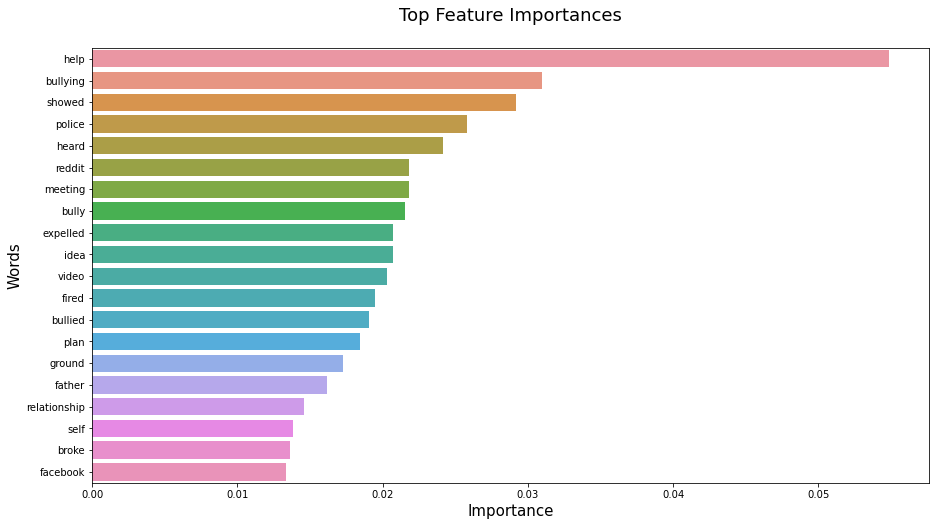

In [20]:
top_20 = feature_df.sort_values(by = "Importance", ascending = False).head(20)

plt.figure(figsize=(15,8))
ax = sns.barplot(x = top_20["Importance"], y = top_20.index, orient = "h")
ax.set_title("Top Feature Importances" + "\n", fontsize = 18)
ax.set_xlabel("Importance", fontsize = 15)
ax.set_ylabel("Words", fontsize = 15)
plt.show()

In [15]:
feature_df.sort_values(by = "Importance", ascending = False).head(100)

,Importance
help,0.054881
bullying,0.031010
showed,0.029202
police,0.025817
heard,0.024159
reddit,0.021843
meeting,0.021796
bully,0.021565
expelled,0.020687
idea,0.020685
